In [1]:
#Required python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import pickle
import re

import nltk
import nltk.data
from string import punctuation 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords

In [2]:
df_senti=pd.read_csv("../data/raw/sentiments_training.csv", encoding= 'unicode_escape')
df_test=pd.read_csv("../data/raw/sentiments_test.csv", encoding= 'unicode_escape')

In [3]:
df_senti.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
df_test.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
df_senti.shape,df_test.shape

((27481, 10), (4815, 9))

In [6]:
print("Training set:",df_senti['sentiment'].value_counts())
print("Test set:",df_test['sentiment'].value_counts())

Training set: neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64
Test set: neutral     1430
positive    1103
negative    1001
Name: sentiment, dtype: int64


In [7]:
def text_cleaning(text):
   
    text = re.sub(r"[^A-Za-z]", " ", str(text))
    
     #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Remove punctuation from text
    text = "".join([c for c in text if c not in punctuation])
    stopwords = nltk.corpus.stopwords.words('english')
    text = text.split()
    text = [w for w in text if not w in stopwords]
    text = " ".join(text)
        
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemmatized_words)
    text=text.lower()
    
    return text 

In [8]:
df_senti['cleaned_text'] = df_senti['text'].apply(lambda x: text_cleaning(x))
df_test['cleaned_text'] = df_test['text'].apply(lambda x: text_cleaning(x))

In [9]:
df_senti['number_words']=df_senti['cleaned_text'].str.split().apply(len)
df_test['number_words']=df_test['cleaned_text'].str.split().apply(len)

In [10]:
df_senti['number_words'].min(),df_senti['number_words'].max(), df_senti['number_words'].median()

(0, 28, 7.0)

In [11]:
df_test['number_words'].min(),df_test['number_words'].max(), df_test['number_words'].median()

(0, 30, 5.0)

In [12]:
df_senti[df_senti['number_words'] == 0]

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text,number_words
641,5210cc55ae,no,no,neutral,night,70-100,"Eswatini (fmr. ""Swaziland"")",1160164,17200.0,67,,0
876,83cdbdeada,i can`t.,i can`t.,neutral,morning,0-20,Liberia,5057681,96320.0,53,,0
1385,f0032bffad,what have you been up to ?,what have you been up to ?,neutral,night,70-100,Kiribati,119449,810.0,147,,0
1490,07e2fab0da,no its the same,no its the same,neutral,night,31-45,Zimbabwe,14862924,386850.0,38,,0
3035,d497141ca8,me too,me too,neutral,night,70-100,Equatorial Guinea,1402985,28050.0,50,,0
3675,f18b9435c8,with,with,neutral,morning,46-60,Mauritania,4649658,1030700.0,5,,0
3752,7e380417bd,"me, here again!","me, here again!",neutral,night,31-45,United Kingdom,67886011,241930.0,281,,0
3931,83f28fbd7f,and to you too!!!!,and to you too!!!!,neutral,noon,21-30,Cyprus,1207359,9240.0,131,,0
4144,bddc0216f5,no they didn`t!,no they didn`t!,neutral,noon,60-70,Gabon,2225734,257670.0,9,,0
4733,3ec3a0b335,that`ll do it too,that`ll do it too,neutral,night,70-100,Ghana,31072940,227540.0,137,,0


In [13]:
len(df_senti[df_senti['number_words'] == 0])

42

In [17]:
df_senti[df_senti['number_words'] == 1]

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text,number_words
8,e050245fbd,Both of you,Both of you,neutral,night,31-45,Australia,25499884,7682300.0,3,both,1
19,40e7becabf,Hes just not that into you,Hes just not that into you,neutral,noon,21-30,Bhutan,771608,38100.0,20,hes,1
42,2e7082d1c8,MAYDAY?!,MAYDAY?!,neutral,morning,0-20,Cuba,11326616,106440.0,106,mayday,1
68,fa2654e730,Chilliin,Chilliin,positive,night,31-45,Guatemala,17915568,107160.0,167,chilliin,1
111,f0c1601d8b,has tickets.......?,has tickets.......?,neutral,morning,46-60,Micronesia,115023,700.0,164,ticket,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27235,746c1514c8,picat 21,picat 21,neutral,noon,21-30,Bhutan,771608,38100.0,20,picat,1
27261,766e174bd3,: I`ve been!,: I`ve been!,neutral,morning,46-60,Democratic Republic of the Congo,89561403,2267050.0,40,i,1
27351,0161b55ae1,just threw up,threw,negative,morning,46-60,Papua New Guinea,8947024,452860.0,20,threw,1
27366,de241b8d04,in 7-11 w/o you,in 7-11 w/o you,neutral,morning,0-20,Sao Tome and Principe,219159,960.0,228,w,1


While observing the one word sentences, many of the words doesn't make sense. As these are 2% of the whole data, need to check whether to remove them or not.

In [16]:
df0=df_senti[df_senti['number_words']>0]
df1=df_senti[df_senti['number_words']>1]

df_test=df_test[df_test['number_words']>0]
print(df_senti.shape)
print(df0.shape)
print(df1.shape)

print(df_test.shape)

(27481, 12)
(27439, 12)
(26850, 12)
(4806, 11)


In [17]:
print(df0['sentiment'].value_counts())
print(df1['sentiment'].value_counts())

neutral     11078
positive     8581
negative     7780
Name: sentiment, dtype: int64
neutral     10699
positive     8479
negative     7672
Name: sentiment, dtype: int64


In [18]:
print(df0['number_words'].min(),df0['number_words'].max(), df0['number_words'].median())
print(df1['number_words'].min(),df1['number_words'].max(), df1['number_words'].median())

1 28 7.0
2 28 8.0


In [19]:
df_test['number_words'].min(),df_test['number_words'].max(), df_test['number_words'].median()

(1, 30, 5.0)

In [20]:
df0=df0[['cleaned_text','sentiment']]

In [21]:
df0=df0.reset_index()
df0

,index,cleaned_text,sentiment
0,0,i responded i going,neutral
1,1,sooo sad i miss san diego,negative
2,2,bos bullying,negative
3,3,interview leave alone,negative
4,4,sons put release already bought,negative
...,...,...,...
27434,27476,wish could come see u denver husband lost job ...,negative
27435,27477,i wondered rake the client made clear net forc...,negative
27436,27478,yay good enjoy break probably need hectic week...,positive
27437,27479,but worth,positive


In [38]:
df1=df1[['cleaned_text','sentiment']]
df1=df1.reset_index()
df1

,index,cleaned_text,sentiment
0,0,i responded i going,neutral
1,1,sooo sad i miss san diego,negative
2,2,bos bullying,negative
3,3,interview leave alone,negative
4,4,sons put release already bought,negative
...,...,...,...
26845,27476,wish could come see u denver husband lost job ...,negative
26846,27477,i wondered rake the client made clear net forc...,negative
26847,27478,yay good enjoy break probably need hectic week...,positive
26848,27479,but worth,positive


In [22]:
df0.to_csv("../data/processed/cleaned_text_sentiment0.csv", index=False, header=False)

In [39]:
df1.to_csv("../data/processed/cleaned_text_sentiment1.csv", index=False, header=False)

In [23]:
df0['labels'] = df0['sentiment'].factorize()[0]
df0.head()

,index,cleaned_text,sentiment,labels
0,0,i responded i going,neutral,0
1,1,sooo sad i miss san diego,negative,1
2,2,bos bullying,negative,1
3,3,interview leave alone,negative,1
4,4,sons put release already bought,negative,1


In [40]:
df1['labels'] = df1['sentiment'].factorize()[0]
df1.head()

,index,cleaned_text,sentiment,labels
0,0,i responded i going,neutral,0
1,1,sooo sad i miss san diego,negative,1
2,2,bos bullying,negative,1
3,3,interview leave alone,negative,1
4,4,sons put release already bought,negative,1


In [24]:
uniquevalues = pd.unique(df0[['sentiment']].values.ravel())
df_unique=pd.DataFrame(uniquevalues,columns=['sentiment'])
df_unique

,sentiment
0,neutral
1,negative
2,positive


In [29]:
df_unique.to_csv('../labels_prediction/sentiments.csv',index=False)

In [25]:
df_test=df_test.dropna()
df_test

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text,number_words
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http twitpic com ezh,7
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also really exciting precisely skyscr...,12
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recession hit veronique branquinho quit compan...,7
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday,2
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http twitpic com w p i like,7
...,...,...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0,im tired sleep try,4
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0,all alone old house thanks net keep alive kick...,15
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0,i know mean my little dog sinking depression w...,12
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0,sutra next youtube video gonna i love video,8


In [26]:
df_test=df_test.reset_index()
df_test=df_test[['cleaned_text','sentiment']].copy()

In [27]:
mapp={'neutral':0,'negative':1,'positive':2}
df_test['labels']=df_test['sentiment'].map(mapp)

In [28]:
df_test

,cleaned_text,sentiment,labels
0,last session day http twitpic com ezh,neutral,0
1,shanghai also really exciting precisely skyscr...,positive,2
2,recession hit veronique branquinho quit compan...,negative,1
3,happy bday,positive,2
4,http twitpic com w p i like,positive,2
...,...,...,...
3520,im tired sleep try,negative,1
3521,all alone old house thanks net keep alive kick...,positive,2
3522,i know mean my little dog sinking depression w...,negative,1
3523,sutra next youtube video gonna i love video,positive,2


In [29]:
#importing libraries for models and nlp tasks
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import utils

In [30]:
tfidf_vectorizer = TfidfVectorizer()

In [31]:
ytrain =df0['labels']
ytest=df_test['labels']

In [32]:
Xtrain_tfidf = tfidf_vectorizer.fit_transform(df0['cleaned_text'])
Xtest_tfidf = tfidf_vectorizer.transform(df_test['cleaned_text'])

In [33]:
with open('../tfidfvectors/tfidf_vect_sentiment0.pkl', 'wb') as file:  
    pickle.dump(tfidf_vectorizer, file) 

##### Logistic Regression model

In [34]:
#Logistic Regression with multinomial
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(Xtrain_tfidf, ytrain)

/Users/phanisingaraju/opt/anaconda3/envs/emotionanalysis_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [35]:
ypred_lr_mn=lr_mn.predict(Xtest_tfidf)

In [36]:
tr_acc_lr_mn = lr_mn.score(Xtrain_tfidf, ytrain)*100
test_acc_lr_mn =  accuracy_score(ytest,ypred_lr_mn) * 100
print(tr_acc_lr_mn,test_acc_lr_mn)

81.26753890447903 70.18439716312056


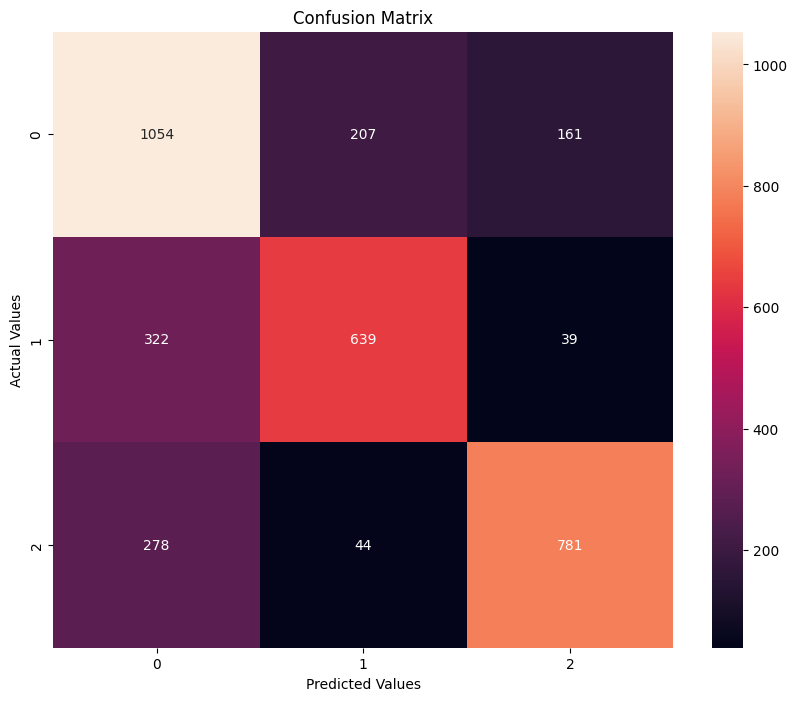

In [37]:
cm = confusion_matrix(ytest, ypred_lr_mn)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Removing 1 word data which might be noise and see whether there is any improvement in the result

In [41]:
ytrain =df1['labels']


In [42]:
Xtrain_tfidf = tfidf_vectorizer.fit_transform(df1['cleaned_text'])
Xtest_tfidf = tfidf_vectorizer.transform(df_test['cleaned_text'])

In [44]:
with open('../tfidfvectors/tfidf_vect_sentiment1.pkl', 'wb') as file:  
    pickle.dump(tfidf_vectorizer, file) 

In [45]:
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(Xtrain_tfidf, ytrain)

/Users/phanisingaraju/opt/anaconda3/envs/emotionanalysis_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [46]:
ypred_lr_mn=lr_mn.predict(Xtest_tfidf)

In [47]:
tr_acc_lr_mn = lr_mn.score(Xtrain_tfidf, ytrain)*100
test_acc_lr_mn =  accuracy_score(ytest,ypred_lr_mn) * 100
print(tr_acc_lr_mn,test_acc_lr_mn)

81.54562383612662 70.15602836879432


In [49]:
pickle.dump(lr_mn, open('../models/lr_mn_sentiment.pkl', 'wb'))

##### SVM Classifier

In [48]:
%%time
svm = SVC( kernel ='linear',C = 1, decision_function_shape='ovo')
svm.fit(Xtrain_tfidf, ytrain)

CPU times: user 1min 7s, sys: 540 ms, total: 1min 8s
Wall time: 1min 8s


SVC(C=1, decision_function_shape='ovo', kernel='linear')

In [50]:
ypred_svm=svm.predict(Xtest_tfidf)

In [51]:
tr_acc_svm= svm.score(Xtrain_tfidf, ytrain)*100
test_acc_svm =  accuracy_score(ytest,ypred_svm) * 100
print(tr_acc_svm,test_acc_svm)

83.1657355679702 71.94326241134752


In [52]:
pickle.dump(svm, open('../models/svm_sentiment.pkl', 'wb'))

##### KNN classifier

In [57]:
%%time
k_range = range(10,200,10)
train_scores = []
test_scores = []
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    knn=neigh.fit(Xtrain_tfidf,ytrain)
    tr_acc_knn = knn.score(Xtrain_tfidf, ytrain)*100
    ypred_knn = knn.predict(Xtest_tfidf)
    accuracy_knn = accuracy_score(ytest,ypred_knn)
    test_acc_knn = accuracy_knn * 100
    train_scores.append(tr_acc_knn)
    test_scores.append(test_acc_knn)

CPU times: user 12min 12s, sys: 21.7 s, total: 12min 33s
Wall time: 1min 46s


In [58]:
K=pd.Series(k_range)


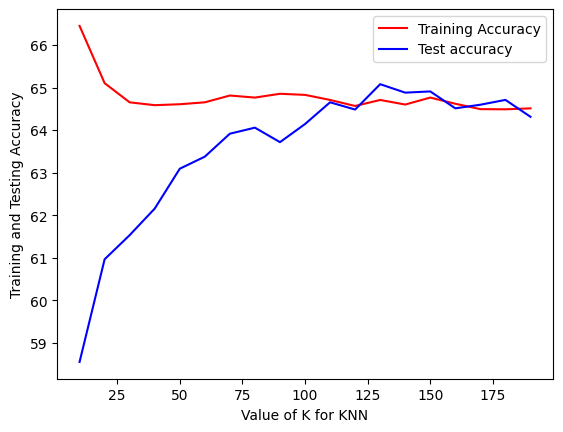

In [59]:
plt.plot(K, train_scores,color='r',label='Training Accuracy')
plt.plot(K, test_scores,color='b',label='Test accuracy')


plt.xlabel('Value of K for KNN')
plt.ylabel('Training and Testing Accuracy')
plt.legend()
plt.show()

for small range of k values

In [60]:
%%time
k_range = range(100,125)
train_scores = []
test_scores = []
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    knn=neigh.fit(Xtrain_tfidf,ytrain)
    tr_acc_knn = knn.score(Xtrain_tfidf, ytrain)*100
    ypred_knn = knn.predict(Xtest_tfidf)
    accuracy_knn = accuracy_score(ytest,ypred_knn)
    test_acc_knn = accuracy_knn * 100
    train_scores.append(tr_acc_knn)
    test_scores.append(test_acc_knn)

CPU times: user 16min 1s, sys: 27.1 s, total: 16min 28s
Wall time: 2min 21s


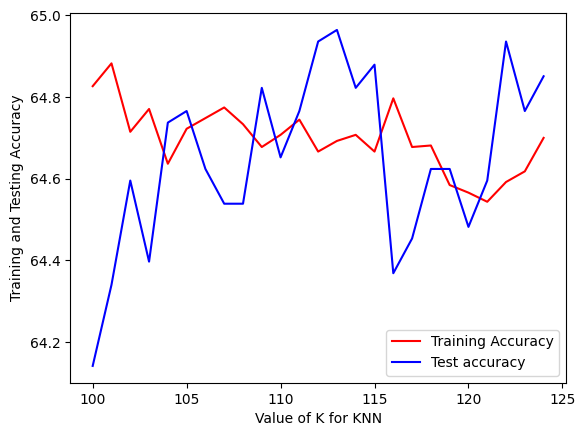

In [61]:
K=pd.Series(k_range)
plt.plot(K, train_scores,color='r',label='Training Accuracy')
plt.plot(K, test_scores,color='b',label='Test accuracy')
plt.xlabel('Value of K for KNN')
plt.ylabel('Training and Testing Accuracy')
plt.legend()
plt.show()

In [65]:
neigh = KNeighborsClassifier(n_neighbors=100)
knn=neigh.fit(Xtrain_tfidf,ytrain)
tr_acc_knn = knn.score(Xtrain_tfidf, ytrain)*100
ypred_knn = knn.predict(Xtest_tfidf)
accuracy_knn = accuracy_score(ytest,ypred_knn)
test_acc_knn = accuracy_knn * 100

print(tr_acc_knn,test_acc_knn)

64.8268156424581 64.1418439716312


In [66]:
pickle.dump(knn, open('../models/knn_sentiment.pkl', 'wb'))

##### XGB Classifier

In [67]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 6,
                      gamma=0,  subsample=0.8, colsample_bytree=0.8, seed=27)

In [68]:
eval_set = [(Xtrain_tfidf, ytrain),(Xtest_tfidf, ytest)]

In [69]:
xgb.fit(Xtrain_tfidf, ytrain, eval_metric='auc', eval_set=eval_set, verbose=True)


[0]	validation_0-auc:0.65164	validation_1-auc:0.65383
[1]	validation_0-auc:0.68139	validation_1-auc:0.68130
[2]	validation_0-auc:0.68291	validation_1-auc:0.68302
[3]	validation_0-auc:0.68556	validation_1-auc:0.68605
[4]	validation_0-auc:0.68972	validation_1-auc:0.68997


/Users/phanisingaraju/opt/anaconda3/envs/emotionanalysis_env/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-auc:0.70112	validation_1-auc:0.70129
[6]	validation_0-auc:0.70115	validation_1-auc:0.70105
[7]	validation_0-auc:0.70652	validation_1-auc:0.70584
[8]	validation_0-auc:0.71112	validation_1-auc:0.71100
[9]	validation_0-auc:0.71129	validation_1-auc:0.71105
[10]	validation_0-auc:0.71522	validation_1-auc:0.71497
[11]	validation_0-auc:0.72265	validation_1-auc:0.72181
[12]	validation_0-auc:0.72306	validation_1-auc:0.72116
[13]	validation_0-auc:0.72341	validation_1-auc:0.72149
[14]	validation_0-auc:0.72582	validation_1-auc:0.72408
[15]	validation_0-auc:0.73290	validation_1-auc:0.73214
[16]	validation_0-auc:0.73366	validation_1-auc:0.73245
[17]	validation_0-auc:0.73967	validation_1-auc:0.73473
[18]	validation_0-auc:0.74259	validation_1-auc:0.73641
[19]	validation_0-auc:0.74521	validation_1-auc:0.73835
[20]	validation_0-auc:0.75274	validation_1-auc:0.74605
[21]	validation_0-auc:0.75543	validation_1-auc:0.74740
[22]	validation_0-auc:0.75773	validation_1-auc:0.74988
[23]	validation

[154]	validation_0-auc:0.86094	validation_1-auc:0.82232
[155]	validation_0-auc:0.86115	validation_1-auc:0.82226
[156]	validation_0-auc:0.86139	validation_1-auc:0.82241
[157]	validation_0-auc:0.86171	validation_1-auc:0.82221
[158]	validation_0-auc:0.86201	validation_1-auc:0.82241
[159]	validation_0-auc:0.86223	validation_1-auc:0.82253
[160]	validation_0-auc:0.86252	validation_1-auc:0.82281
[161]	validation_0-auc:0.86302	validation_1-auc:0.82290
[162]	validation_0-auc:0.86333	validation_1-auc:0.82326
[163]	validation_0-auc:0.86354	validation_1-auc:0.82337
[164]	validation_0-auc:0.86385	validation_1-auc:0.82363
[165]	validation_0-auc:0.86405	validation_1-auc:0.82373
[166]	validation_0-auc:0.86412	validation_1-auc:0.82389
[167]	validation_0-auc:0.86444	validation_1-auc:0.82413
[168]	validation_0-auc:0.86481	validation_1-auc:0.82443
[169]	validation_0-auc:0.86502	validation_1-auc:0.82452
[170]	validation_0-auc:0.86516	validation_1-auc:0.82457
[171]	validation_0-auc:0.86529	validation_1-auc:

[301]	validation_0-auc:0.88914	validation_1-auc:0.83694
[302]	validation_0-auc:0.88927	validation_1-auc:0.83702
[303]	validation_0-auc:0.88945	validation_1-auc:0.83701
[304]	validation_0-auc:0.88958	validation_1-auc:0.83725
[305]	validation_0-auc:0.88970	validation_1-auc:0.83736
[306]	validation_0-auc:0.88983	validation_1-auc:0.83758
[307]	validation_0-auc:0.88993	validation_1-auc:0.83762
[308]	validation_0-auc:0.88996	validation_1-auc:0.83766
[309]	validation_0-auc:0.89009	validation_1-auc:0.83773
[310]	validation_0-auc:0.89020	validation_1-auc:0.83773
[311]	validation_0-auc:0.89029	validation_1-auc:0.83775
[312]	validation_0-auc:0.89042	validation_1-auc:0.83781
[313]	validation_0-auc:0.89067	validation_1-auc:0.83791
[314]	validation_0-auc:0.89075	validation_1-auc:0.83799
[315]	validation_0-auc:0.89088	validation_1-auc:0.83796
[316]	validation_0-auc:0.89098	validation_1-auc:0.83796
[317]	validation_0-auc:0.89113	validation_1-auc:0.83803
[318]	validation_0-auc:0.89136	validation_1-auc:

[448]	validation_0-auc:0.90540	validation_1-auc:0.84411
[449]	validation_0-auc:0.90554	validation_1-auc:0.84410
[450]	validation_0-auc:0.90565	validation_1-auc:0.84404
[451]	validation_0-auc:0.90573	validation_1-auc:0.84407
[452]	validation_0-auc:0.90581	validation_1-auc:0.84412
[453]	validation_0-auc:0.90588	validation_1-auc:0.84419
[454]	validation_0-auc:0.90598	validation_1-auc:0.84421
[455]	validation_0-auc:0.90611	validation_1-auc:0.84417
[456]	validation_0-auc:0.90623	validation_1-auc:0.84427
[457]	validation_0-auc:0.90634	validation_1-auc:0.84425
[458]	validation_0-auc:0.90644	validation_1-auc:0.84425
[459]	validation_0-auc:0.90651	validation_1-auc:0.84419
[460]	validation_0-auc:0.90661	validation_1-auc:0.84420
[461]	validation_0-auc:0.90674	validation_1-auc:0.84423
[462]	validation_0-auc:0.90683	validation_1-auc:0.84419
[463]	validation_0-auc:0.90684	validation_1-auc:0.84434
[464]	validation_0-auc:0.90689	validation_1-auc:0.84440
[465]	validation_0-auc:0.90696	validation_1-auc:

[595]	validation_0-auc:0.91733	validation_1-auc:0.84671
[596]	validation_0-auc:0.91738	validation_1-auc:0.84672
[597]	validation_0-auc:0.91746	validation_1-auc:0.84673
[598]	validation_0-auc:0.91752	validation_1-auc:0.84685
[599]	validation_0-auc:0.91756	validation_1-auc:0.84682
[600]	validation_0-auc:0.91762	validation_1-auc:0.84681
[601]	validation_0-auc:0.91768	validation_1-auc:0.84683
[602]	validation_0-auc:0.91773	validation_1-auc:0.84686
[603]	validation_0-auc:0.91787	validation_1-auc:0.84681
[604]	validation_0-auc:0.91794	validation_1-auc:0.84674
[605]	validation_0-auc:0.91801	validation_1-auc:0.84680
[606]	validation_0-auc:0.91809	validation_1-auc:0.84678
[607]	validation_0-auc:0.91817	validation_1-auc:0.84674
[608]	validation_0-auc:0.91822	validation_1-auc:0.84673
[609]	validation_0-auc:0.91828	validation_1-auc:0.84685
[610]	validation_0-auc:0.91837	validation_1-auc:0.84690
[611]	validation_0-auc:0.91846	validation_1-auc:0.84699
[612]	validation_0-auc:0.91853	validation_1-auc:

[742]	validation_0-auc:0.92635	validation_1-auc:0.84881
[743]	validation_0-auc:0.92641	validation_1-auc:0.84878
[744]	validation_0-auc:0.92647	validation_1-auc:0.84877
[745]	validation_0-auc:0.92651	validation_1-auc:0.84880
[746]	validation_0-auc:0.92654	validation_1-auc:0.84882
[747]	validation_0-auc:0.92659	validation_1-auc:0.84885
[748]	validation_0-auc:0.92666	validation_1-auc:0.84882
[749]	validation_0-auc:0.92673	validation_1-auc:0.84886
[750]	validation_0-auc:0.92678	validation_1-auc:0.84889
[751]	validation_0-auc:0.92684	validation_1-auc:0.84885
[752]	validation_0-auc:0.92691	validation_1-auc:0.84887
[753]	validation_0-auc:0.92694	validation_1-auc:0.84885
[754]	validation_0-auc:0.92699	validation_1-auc:0.84892
[755]	validation_0-auc:0.92704	validation_1-auc:0.84898
[756]	validation_0-auc:0.92709	validation_1-auc:0.84900
[757]	validation_0-auc:0.92714	validation_1-auc:0.84896
[758]	validation_0-auc:0.92718	validation_1-auc:0.84904
[759]	validation_0-auc:0.92725	validation_1-auc:

[889]	validation_0-auc:0.93353	validation_1-auc:0.84958
[890]	validation_0-auc:0.93359	validation_1-auc:0.84955
[891]	validation_0-auc:0.93364	validation_1-auc:0.84956
[892]	validation_0-auc:0.93370	validation_1-auc:0.84958
[893]	validation_0-auc:0.93372	validation_1-auc:0.84964
[894]	validation_0-auc:0.93377	validation_1-auc:0.84962
[895]	validation_0-auc:0.93380	validation_1-auc:0.84956
[896]	validation_0-auc:0.93383	validation_1-auc:0.84951
[897]	validation_0-auc:0.93388	validation_1-auc:0.84951
[898]	validation_0-auc:0.93391	validation_1-auc:0.84949
[899]	validation_0-auc:0.93396	validation_1-auc:0.84950
[900]	validation_0-auc:0.93402	validation_1-auc:0.84958
[901]	validation_0-auc:0.93406	validation_1-auc:0.84962
[902]	validation_0-auc:0.93411	validation_1-auc:0.84965
[903]	validation_0-auc:0.93417	validation_1-auc:0.84969
[904]	validation_0-auc:0.93420	validation_1-auc:0.84973
[905]	validation_0-auc:0.93427	validation_1-auc:0.84974
[906]	validation_0-auc:0.93430	validation_1-auc:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_class=6,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [70]:
results = xgb.evals_result()
epochs = len(results['validation_0']['auc'])
x_axis = range(0, epochs)

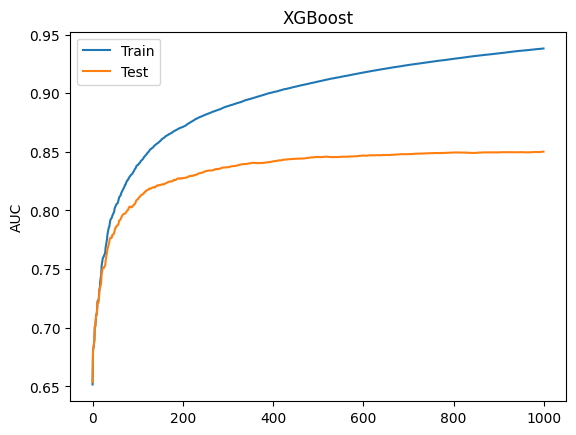

In [71]:
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost')
plt.show()

In [77]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=5,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 3,
                      gamma=0,  subsample=0.8, colsample_bytree=0.8, seed=27)



In [78]:
%%time
xgb.fit(Xtrain_tfidf, ytrain)

CPU times: user 17.6 s, sys: 4.75 s, total: 22.3 s
Wall time: 3.44 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [79]:
ypred_xgb=xgb.predict(Xtest_tfidf)

In [80]:
tr_acc_xgb = xgb.score(Xtrain_tfidf, ytrain)*100
test_acc_xgb =  accuracy_score(ytest,ypred_xgb) * 100
print(tr_acc_xgb,test_acc_xgb)

67.31843575418995 65.98581560283688


In [81]:
pickle.dump(xgb, open('../models/xgb_basic_sentiment.pkl', 'wb'))

Tuning max_depth and min_child_weight

In [86]:
%%time
xgb_hp1=XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=5,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 3,
                      gamma=0,  subsample=0.8, colsample_bytree=0.8, seed=27)



param_grid1={ 'max_depth':range(3,10,2),
              'min_child_weight':[1,2,3,4,5]}

grid_search1 = GridSearchCV(xgb_hp1, param_grid1, scoring="f1_macro", n_jobs=-1, cv=5)


grid_result1 = grid_search1.fit(Xtrain_tfidf, ytrain)

CPU times: user 27.5 s, sys: 5.92 s, total: 33.5 s
Wall time: 2min 34s


In [87]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))


Best: 0.662018 using {'max_depth': 9, 'min_child_weight': 1}


In [89]:
xgb_hp2=XGBClassifier(learning_rate =0.1, n_estimators=100,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 3,
                      gamma=0,  subsample=0.8, colsample_bytree=0.8, seed=27)

param_grid2={
            'max_depth':[8,9,10]
            

}

grid_search2 = GridSearchCV(xgb_hp2, param_grid2, scoring="f1_macro", n_jobs=-1, cv=5)



In [90]:
%%time
grid_result2 = grid_search2.fit(Xtrain_tfidf, ytrain)

CPU times: user 30.5 s, sys: 5.86 s, total: 36.4 s
Wall time: 42.7 s


In [91]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
print(grid_result2.cv_results_['mean_test_score'])

Best: 0.666677 using {'max_depth': 10}
[0.65771128 0.66201829 0.66667713]


Tuning gamma

In [92]:
xgb_hp3=XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=10,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 3,
                      subsample=0.8, colsample_bytree=0.8, seed=27)

param_grid3={
 'gamma':[i/10.0 for i in range(0,5)]
}
grid_search3 = GridSearchCV(xgb_hp3, param_grid3, scoring="f1_macro", n_jobs=-1, cv=5)



In [93]:
%%time
grid_result3 = grid_search3.fit(Xtrain_tfidf, ytrain)

CPU times: user 30.4 s, sys: 6.05 s, total: 36.4 s
Wall time: 1min 22s


In [94]:
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
print(grid_result3.cv_results_['mean_test_score'])


Best: 0.666677 using {'gamma': 0.0}
[0.66667713 0.6658064  0.66639692 0.66655387 0.66535551]


Tuning subsample and colsample_bytree

In [95]:
xgb_hp4=XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=10,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 3,
                      gamma=0, seed=27)

param_grid4={
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid_search4 = GridSearchCV(xgb_hp4, param_grid4, scoring="f1_macro", n_jobs=-1, cv=5)


In [96]:
%%time
grid_result4 = grid_search4.fit(Xtrain_tfidf, ytrain)

CPU times: user 30.6 s, sys: 6.02 s, total: 36.6 s
Wall time: 3min 14s


In [97]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
print(grid_result4.cv_results_['mean_test_score'])


Best: 0.666677 using {'colsample_bytree': 0.8, 'subsample': 0.8}
[0.66452245 0.66462105 0.66491432 0.66517115 0.66531126 0.66539668
 0.66500449 0.66469553 0.66546151 0.6658322  0.66667713 0.66456841
 0.66559082 0.66588501 0.6650521  0.66457187]


In [98]:
param_grid4_small={
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
grid_search4_small = GridSearchCV(xgb_hp4, param_grid4_small, scoring="f1_macro", n_jobs=-1, cv=5)


In [99]:
%%time
grid_result4_small = grid_search4_small.fit(Xtrain_tfidf, ytrain)

CPU times: user 29.5 s, sys: 6.03 s, total: 35.5 s
Wall time: 2min 1s


In [100]:
print("Best: %f using %s" % (grid_result4_small.best_score_, grid_result4_small.best_params_))
print(grid_result4_small.cv_results_['mean_test_score'])


Best: 0.666940 using {'colsample_bytree': 0.75, 'subsample': 0.75}
[0.6669401  0.66600132 0.66468804 0.66679322 0.66667713 0.66570031
 0.6664064  0.66556826 0.66587638]


In [101]:
xgb_clf= XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=10,
                      min_child_weight=1, objective= 'multi:softmax', num_class= 3,
                      gamma=0,  subsample=0.75, colsample_bytree=0.75, seed=27)

In [102]:
xgb_clf.fit(Xtrain_tfidf, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [103]:
ypred_xgb_clf=xgb_clf.predict(Xtest_tfidf)

In [104]:
tr_acc_xgb_clf = xgb_clf.score(Xtrain_tfidf, ytrain)*100
test_acc_xgb_clf =  accuracy_score(ytest,ypred_xgb_clf) * 100
print(tr_acc_xgb_clf,test_acc_xgb_clf)

72.20856610800745 68.08510638297872


In [105]:
pickle.dump(xgb_clf, open('../models/xgb_hp_sentiment.pkl', 'wb'))